In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer


In [41]:
df = pd.read_csv('5000_old_car.csv')

In [42]:
df

,Unnamed: 0,id,url,location,car_body_type,price,make,model,variant,year,petrol,transmission,mileage,number_of_owners
0,0,1669356947,Maruti Suzuki Wagon R 2010,Telangana,HATCHBACK,120000.0,maruti-suzuki,maruti-suzuki-wagon-r,wagon-r-2010-2012-ax-bsiv,2010.0,petrol,2.0,100000.0,1.0
1,1,1669356945,"Mercedes-Benz E-Class 220 CDI Sport, 2012, Diesel",Punjab,LUXURY_SEDAN,1175000.0,mercedes-benz,mercedes-benz-e-class,version-E-Class 220 CDI Sport-1711,2012.0,diesel,1.0,67000.0,2.0
2,2,1669356924,Honda amaze well good condition,Rajasthan,SEDAN,400000.0,cars-honda,cars-honda-amaze,version-Amaze 1.5 E i-DTEC-722,2013.0,diesel,2.0,120466.0,2.0
3,3,1669356922,"Maruti Suzuki Baleno Zeta, 2019, Petrol",Haryana,HATCHBACK,689200.0,maruti-suzuki,maruti-suzuki-baleno,baleno-zeta,2019.0,petrol,2.0,16900.0,1.0
4,4,1669356889,"Mahindra Scorpio S5 Plus, 2016, Diesel",Tamil Nadu,SUV,920000.0,mahindra,mahindra-scorpio,version-S5 Plus-3734,2016.0,diesel,2.0,40500.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,14,1669364767,"Volkswagen Vento TDI , 2012 Diesel 70000 Km Dr...",Andhra Pradesh,SEDAN,290000.0,volkswagen,volkswagen-vento,vento-1.6-comfortline,2012.0,diesel,2.0,70000.0,1.0
6013,15,1669364751,Innova v model\n2012 Good Condition\nFull orig...,Haryana,SUV,520000.0,toyota,toyota-innova,innova-2.5-vx-(diesel)-7-seater-bs-iv,2012.0,diesel,2.0,135000.0,3.0
6014,16,1669364689,"Maruti Suzuki Omni E MPI STD, 2009, Petrol",Andhra Pradesh,MINIVAN,150000.0,maruti-suzuki,maruti-suzuki-omni,omni-e-mpi-std,2009.0,petrol,2.0,45000.0,1.0
6015,17,1669364673,"Skoda Rapid 1.5 TDI Style/1.5 AT Style, 2018, ...",Gujarat,SEDAN,880000.0,skoda,skoda-rapid,version-Rapid-Style 1.5,2018.0,diesel,1.0,102000.0,1.0


In [43]:
df.shape

(6017, 14)

In [44]:
df.dtypes

Unnamed: 0            int64
id                    int64
url                  object
location             object
car_body_type        object
price               float64
make                 object
model                object
variant              object
year                float64
petrol               object
transmission        float64
mileage             float64
number_of_owners    float64
dtype: object

In [45]:
df.isnull().sum()

Unnamed: 0            0
id                    0
url                   0
location              0
car_body_type         0
price                 0
make                  0
model                 0
variant             405
year                  0
petrol               73
transmission        225
mileage               0
number_of_owners    512
dtype: int64

In [46]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'location', 'car_body_type', 'price', 'make',
       'model', 'variant', 'year', 'petrol', 'transmission', 'mileage',
       'number_of_owners'],
      dtype='object')

In [47]:
# Droping Id index and url
df.drop(['Unnamed: 0', 'id', 'url' ],axis=1,inplace=True)

In [48]:
df.head()

,location,car_body_type,price,make,model,variant,year,petrol,transmission,mileage,number_of_owners
0,Telangana,HATCHBACK,120000.0,maruti-suzuki,maruti-suzuki-wagon-r,wagon-r-2010-2012-ax-bsiv,2010.0,petrol,2.0,100000.0,1.0
1,Punjab,LUXURY_SEDAN,1175000.0,mercedes-benz,mercedes-benz-e-class,version-E-Class 220 CDI Sport-1711,2012.0,diesel,1.0,67000.0,2.0
2,Rajasthan,SEDAN,400000.0,cars-honda,cars-honda-amaze,version-Amaze 1.5 E i-DTEC-722,2013.0,diesel,2.0,120466.0,2.0
3,Haryana,HATCHBACK,689200.0,maruti-suzuki,maruti-suzuki-baleno,baleno-zeta,2019.0,petrol,2.0,16900.0,1.0
4,Tamil Nadu,SUV,920000.0,mahindra,mahindra-scorpio,version-S5 Plus-3734,2016.0,diesel,2.0,40500.0,2.0


In [49]:
# Replace Null Values with NOt avaliable

for i,column_data in enumerate(df.dtypes.items()):
    column, dtype = column_data
    if dtype == 'object':
        df[column].fillna('Not avaliable',inplace=True)
    else:
        df[column].fillna(method='pad',inplace=True)

In [50]:
df.isna().sum()

location            0
car_body_type       0
price               0
make                0
model               0
variant             0
year                0
petrol              0
transmission        0
mileage             0
number_of_owners    0
dtype: int64

In [51]:
df[['transmission', 'number_of_owners']] = df[['transmission', 'number_of_owners']].astype('int').astype('object')

In [52]:
df.head()

,location,car_body_type,price,make,model,variant,year,petrol,transmission,mileage,number_of_owners
0,Telangana,HATCHBACK,120000.0,maruti-suzuki,maruti-suzuki-wagon-r,wagon-r-2010-2012-ax-bsiv,2010.0,petrol,2,100000.0,1
1,Punjab,LUXURY_SEDAN,1175000.0,mercedes-benz,mercedes-benz-e-class,version-E-Class 220 CDI Sport-1711,2012.0,diesel,1,67000.0,2
2,Rajasthan,SEDAN,400000.0,cars-honda,cars-honda-amaze,version-Amaze 1.5 E i-DTEC-722,2013.0,diesel,2,120466.0,2
3,Haryana,HATCHBACK,689200.0,maruti-suzuki,maruti-suzuki-baleno,baleno-zeta,2019.0,petrol,2,16900.0,1
4,Tamil Nadu,SUV,920000.0,mahindra,mahindra-scorpio,version-S5 Plus-3734,2016.0,diesel,2,40500.0,2


<AxesSubplot:>

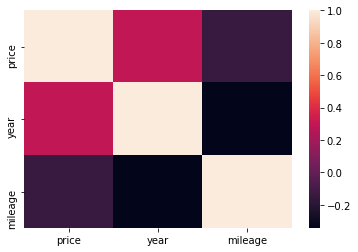

In [53]:
sns.heatmap(df.corr())

# Univariate Analysis

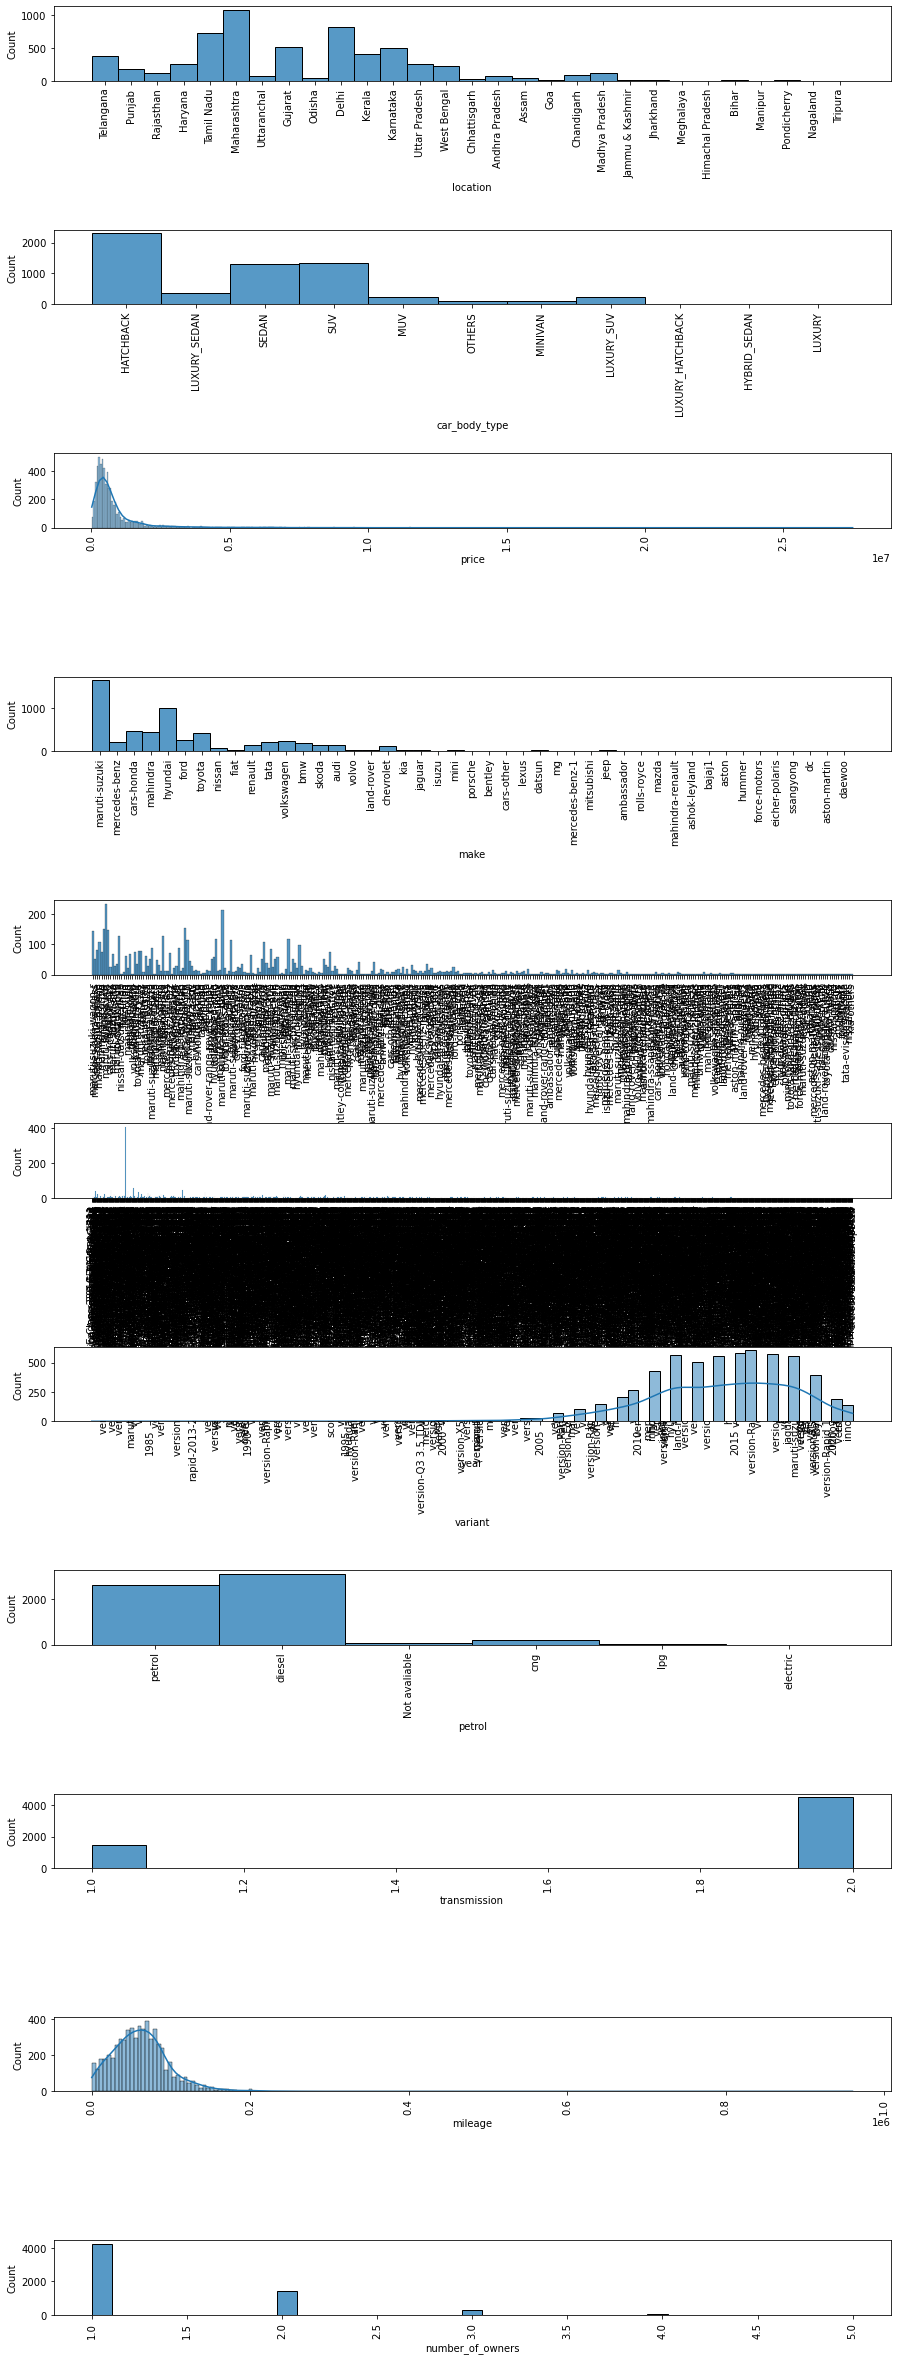

In [15]:
plt.figure(figsize=(15,100))
for i,column_data in enumerate(df.dtypes.items()):
    plt.subplot(25,1,i+1)
    plt.subplots_adjust(hspace=2)
    column, dtype = column_data
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.histplot(df[column])
    else:
        plt.xticks(rotation=90)
        sns.histplot(df[column],kde=True)

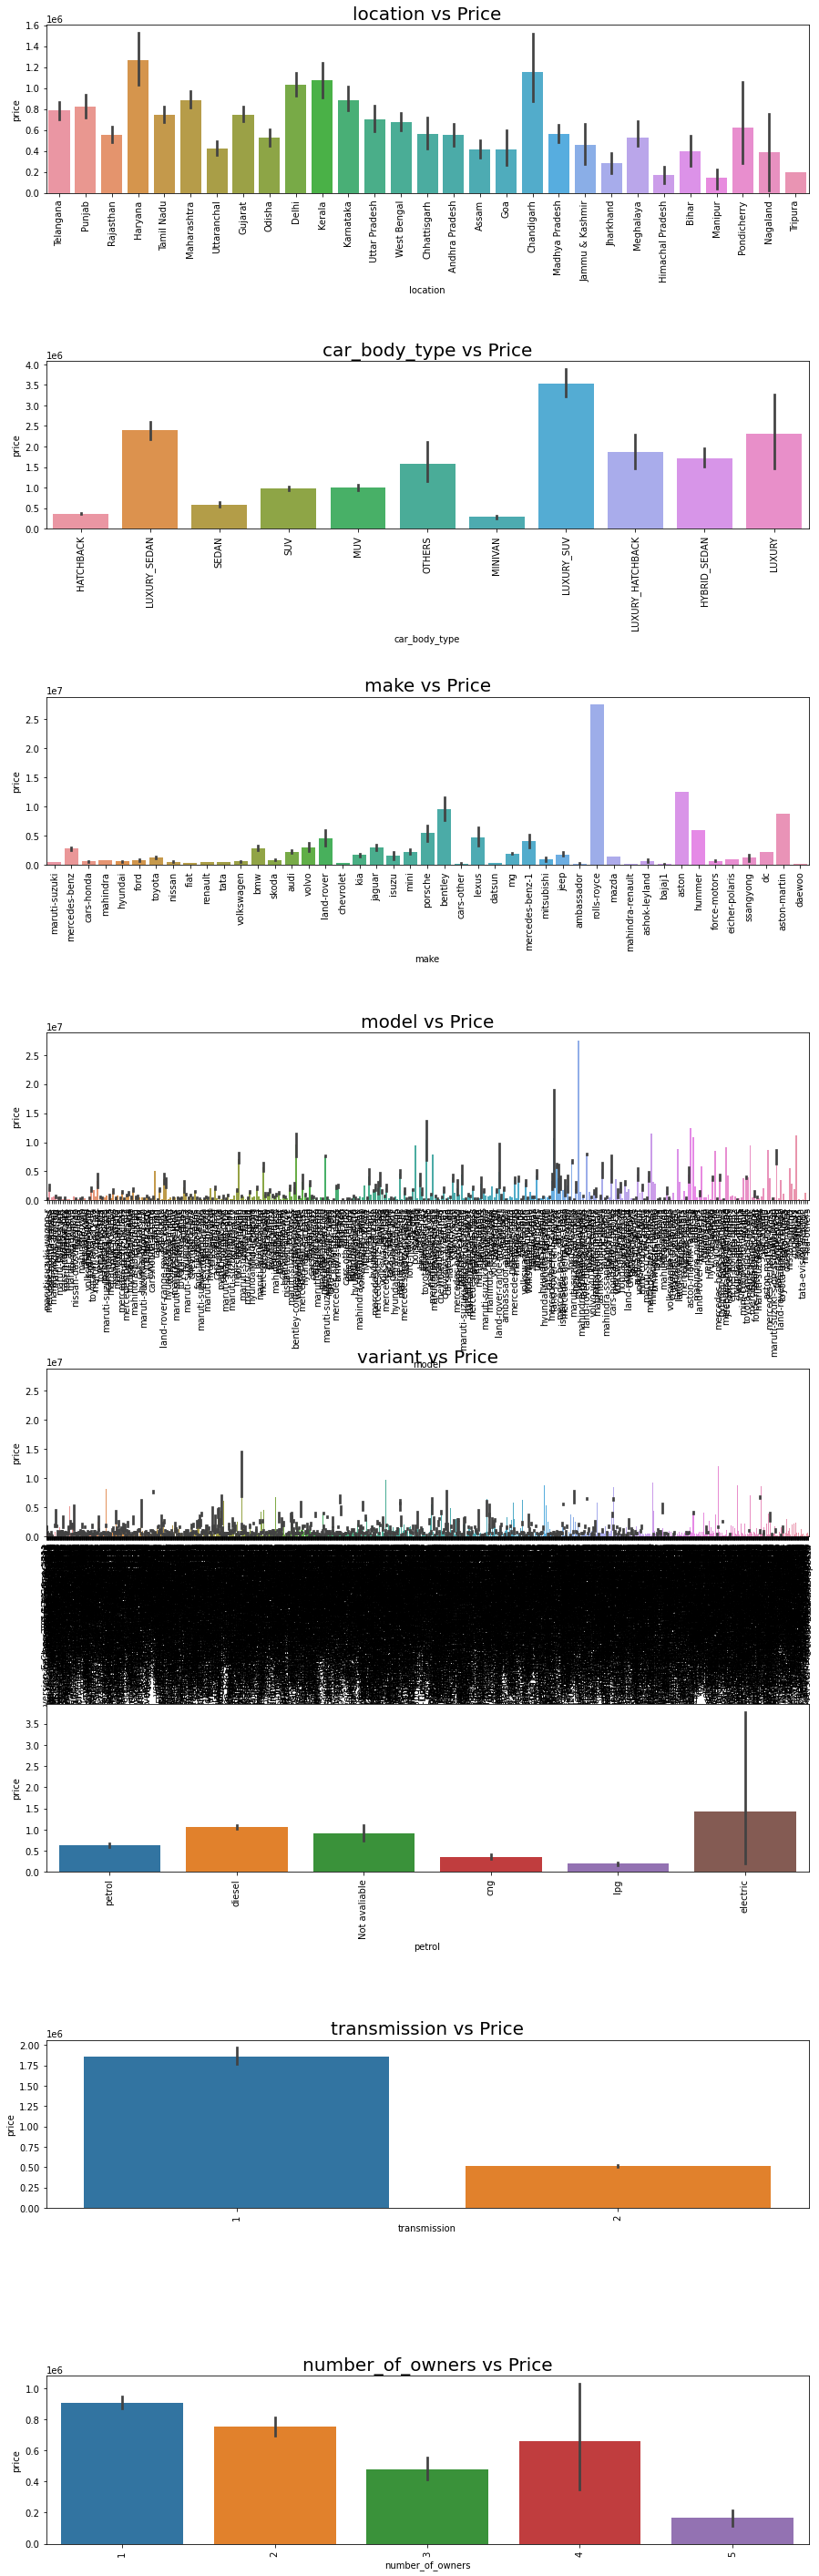

In [55]:
#Bivariate analysis 
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop('price',axis=1).dtypes.items():
    if dtype == 'object':
        plt.subplot(30,1,j+1)  
        plt.xticks(rotation=90)
        plt.subplots_adjust(hspace=1)
        plt.title(column + " vs Price", fontsize = 20)
        sns.barplot(x = df[column],y = df['price'],)
        j += 1

# Label Encoding

In [18]:
obj_columns = df.select_dtypes('object').columns

In [19]:
df[obj_columns] = df[obj_columns].apply(LabelEncoder().fit_transform)

In [20]:
df

,location,car_body_type,price,make,model,variant,year,petrol,transmission,mileage,number_of_owners
0,24,0,120000.0,28,199,2055,2010.0,5,1,100000.0,0
1,21,4,1175000.0,30,220,1267,2012.0,2,0,67000.0,1
2,22,9,400000.0,8,39,1085,2013.0,2,1,120466.0,1
3,8,0,689200.0,28,174,98,2019.0,5,1,16900.0,0
4,23,10,920000.0,26,159,1709,2016.0,2,1,40500.0,1
...,...,...,...,...,...,...,...,...,...,...,...
6012,0,9,290000.0,43,337,930,2012.0,2,1,70000.0,0
6013,8,10,520000.0,42,318,528,2012.0,2,1,135000.0,2
6014,0,6,150000.0,28,186,689,2009.0,5,1,45000.0,0
6015,7,9,880000.0,39,274,1681,2018.0,2,0,102000.0,0


# Checking for outliers 

<AxesSubplot:>

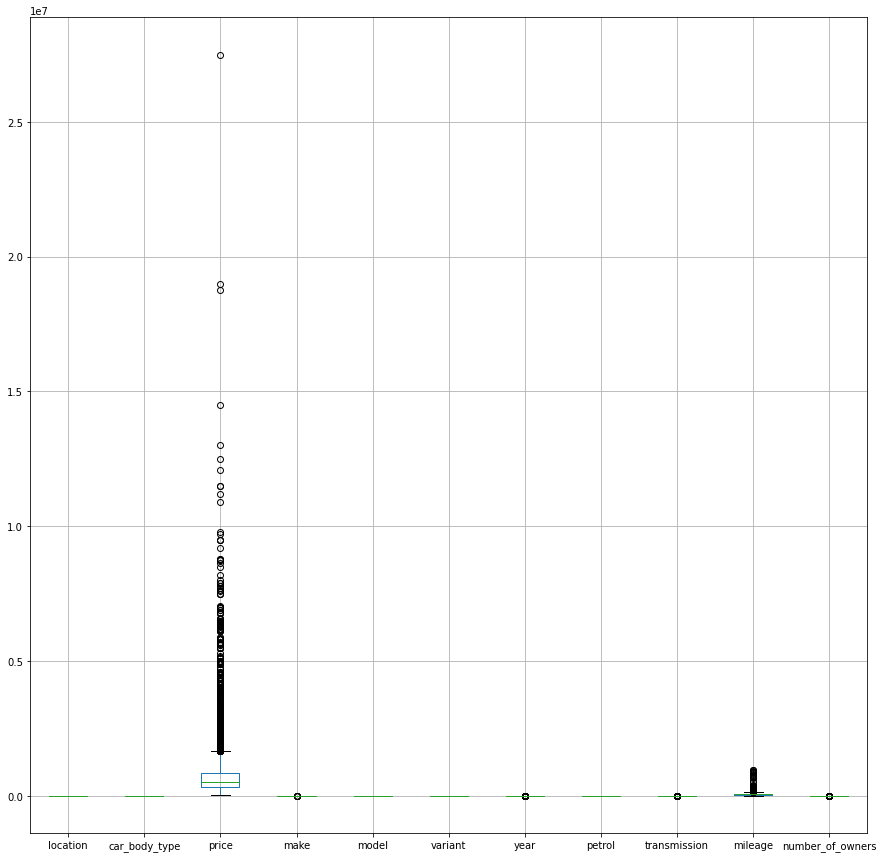

In [21]:
df.boxplot(figsize=(15,15))

In [22]:
X = df.drop('price',axis=1)
y = df['price']

In [23]:
X_transfomred = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X_transfomred,columns=X.columns)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=True,shuffle=True,test_size=.33)

In [25]:
models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [26]:
for model in models:
    print('model ',model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2_s = r2_score(y_test,y_pred)
    print('R2 score:',r2_s)
    print('Mean Absoulte Error: ',mean_absolute_error(y_test,y_pred))
    print('Mean Sqaure Error: ',mean_squared_error(y_test,y_pred))
    print('Root Mean Sqaure:',r2_score(y_test,y_pred))
    score = cross_val_score(model,X,y,cv=10)
    print('Score:',score)
    print('cross val score mean: ',score.mean())
    print('diffrence between r2 score - cross val score: ',r2_s-score.mean())
    print('-'*50)

model  LinearRegression()
R2 score: 0.2891241690916876
Mean Absoulte Error:  483301.8855854832
Mean Sqaure Error:  1137503313444.71
Root Mean Sqaure: 0.2891241690916876
Score: [0.25124112 0.32451498 0.15411924 0.4075323  0.35670946 0.30557816
 0.33025202 0.33241814 0.35818458 0.37925467]
cross val score mean:  0.3199804668230257
diffrence between r2 score - cross val score:  -0.030856297731338134
--------------------------------------------------
model  RandomForestRegressor()
R2 score: 0.6081515112041239
Mean Absoulte Error:  221911.7984273246
Mean Sqaure Error:  627013797619.3212
Root Mean Sqaure: 0.6081515112041239
Score: [0.67029252 0.69711081 0.36565631 0.71810862 0.63236241 0.57767125
 0.67973529 0.74384707 0.74499047 0.81493645]
cross val score mean:  0.6644711200317328
diffrence between r2 score - cross val score:  -0.05631960882760889
--------------------------------------------------
model  DecisionTreeRegressor()
R2 score: 0.428985008737481
Mean Absoulte Error:  275500.43353

# Hyper parameter tunnign

In [27]:
param_grid = {
    'max_depth' : range(10,20),
    'criterion' : ['mse'],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_leaf' : range(2,6)
}
gridSearchCV = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,refit=True,verbose=3)

In [28]:
gridSearchCV.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2; total time=   1.3s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2; total time=   1.3s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2; total time=   1.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2; total time=   1.2s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2; total time=   1.3s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3; total time=   1.2s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3; total time=   1.2s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3; total time=   1.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3; total time=   1.2s
[CV 5/5] END criterion=mse, max_depth=

[CV 3/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=2; total time=   1.3s
[CV 4/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=2; total time=   1.5s
[CV 5/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=2; total time=   1.5s
[CV 1/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3; total time=   1.3s
[CV 2/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3; total time=   1.4s
[CV 3/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3; total time=   1.4s
[CV 4/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3; total time=   1.4s
[CV 5/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3; total time=   1.3s
[CV 1/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=4; total time=   1.3s
[CV 2/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=4; total time=   1.4s


[CV 5/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=2; total time=   1.5s
[CV 1/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3; total time=   1.4s
[CV 2/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3; total time=   1.4s
[CV 3/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3; total time=   1.3s
[CV 4/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3; total time=   1.3s
[CV 5/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3; total time=   1.4s
[CV 1/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=4; total time=   1.4s
[CV 2/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=4; total time=   1.4s
[CV 3/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=4; total time=   1.4s
[CV 4/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=4; total time=   1.3s


[CV 2/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=3; total time=   1.5s
[CV 3/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=3; total time=   1.5s
[CV 4/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=3; total time=   1.4s
[CV 5/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=3; total time=   1.5s
[CV 1/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4; total time=   1.4s
[CV 2/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4; total time=   1.4s
[CV 3/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4; total time=   1.4s
[CV 4/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4; total time=   1.4s
[CV 5/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4; total time=   1.5s
[CV 1/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=5; total time=   1.4s


[CV 4/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=3; total time=   1.5s
[CV 5/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=3; total time=   1.4s
[CV 1/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4; total time=   1.5s
[CV 2/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4; total time=   1.4s
[CV 3/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4; total time=   1.5s
[CV 4/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4; total time=   1.6s
[CV 5/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4; total time=   1.4s
[CV 1/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=5; total time=   1.2s
[CV 2/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=5; total time=   1.3s
[CV 3/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=5; total time=   1.3s


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(10, 20),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(2, 6)},
             verbose=3)

In [29]:
gridSearchCV.best_params_

{'criterion': 'mse',
 'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_leaf': 2}

In [30]:
y_pred = gridSearchCV.best_estimator_.predict(X_test)

In [31]:
r2_score(y_test,y_pred)

0.6245011658513361

# Saving model

In [32]:
joblib.dump(gridSearchCV.best_estimator_,'gridSearchCV.obj')

NameError: name 'jobliblib' is not defined